In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

In [5]:
album = '../TeamProject/album/'
print(album)

../TeamProject/album/


In [6]:
# 데이터 디렉터리 경로
data_dir = '../TeamProject/album/'  # 데이터 디렉터리 경로를 적절히 설정합니다.

# 이미지 데이터와 라벨을 저장할 리스트 생성
image_data = []
labels = []

# 데이터 디렉터리를 반복하며 이미지 로드 및 라벨 부착
for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)

    for filename in os.listdir(class_dir):
        image_path = os.path.join(class_dir, filename)

        # 이미지를 열어 NumPy 배열로 변환
        image = Image.open(image_path)
        # print(image_path)
        image_array = np.array(image).reshape(-1)
 
        if len(image_array) == (48*48*3):

        # 이미지와 라벨을 리스트에 추가
            image_data.append(image_array.tolist())

            labels.append(int(image_path.split("\\")[1].split('_')[1][2]))   

# 이미지 데이터와 라벨을 NumPy 배열로 변환
image_data = np.array(image_data)
# labels = np.array(labels)

# 이미지 데이터 정규화 (0~1 사이로 스케일 조정)
image_data = image_data / 255.0


In [7]:
image_data = image_data.reshape((-1,48,48,3))
image_data.shape

(3233, 48, 48, 3)

In [8]:
import pandas as pd

lables = pd.DataFrame(labels)
labels = pd.get_dummies(labels).astype(int).to_numpy()
labels
# from keras.utils import to_categorical

# labels = to_categorical(labels)
# labels.shape

array([[0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       ...,
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0]])

In [9]:
# model = Sequential([
#     Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)),
#     MaxPooling2D((2, 2)),
#     Conv2D(64, (3, 3), activation='relu'),
#     MaxPooling2D((2, 2)),
#     Flatten(),
#     Dense(64, activation='relu'),
#     Dense(2, activation='softmax')  # 클래스 개수에 맞게 설정
# ])


In [10]:
# CNN 모델 생성

model=Sequential()
model.add(Conv2D(32, (3,3), activation='relu',input_shape=(48, 48, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# 데이터 증강 (선택적)
# datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
# datagen.fit(image_data)

# 모델 학습
model.fit(image_data,labels, batch_size=32, epochs=3,validation_split=0.2)

Epoch 1/3
81/81 [==============================] - 3s 31ms/step - loss: 1.1074 - accuracy: 0.4029 - val_loss: 3.1527 - val_accuracy: 0.0046
Epoch 2/3
81/81 [==============================] - 3s 33ms/step - loss: 1.0370 - accuracy: 0.4648 - val_loss: 3.4124 - val_accuracy: 0.0062
Epoch 3/3
81/81 [==============================] - 3s 31ms/step - loss: 0.9911 - accuracy: 0.5139 - val_loss: 3.9825 - val_accuracy: 0.1499


In [11]:
import matplotlib.pyplot as plt

# 학습 곡선 시각화 함수
def plot_training_history(history):
    # 학습 및 검증 손실 그래프
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # 학습 및 검증 정확도 그래프
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# 이미지 분류 결과 시각화 함수
def plot_image_predictions(model, images, labels, class_names):
    predictions = model.predict(images)
    
    plt.figure(figsize=(12, 8))
    for i in range(len(images)):
        plt.subplot(2, len(images) // 2, i + 1)
        plt.imshow(images[i])
        plt.title(f"True: {class_names[labels[i]]}\nPredicted: {class_names[predictions[i].argmax()]}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

Epoch 1/10
82/82 [==============================] - 3s 26ms/step - loss: 1.2947 - accuracy: 0.3590 - val_loss: 1.2674 - val_accuracy: 0.4003
Epoch 2/10
82/82 [==============================] - 2s 25ms/step - loss: 1.2054 - accuracy: 0.4369 - val_loss: 1.2503 - val_accuracy: 0.4172
Epoch 3/10
82/82 [==============================] - 2s 26ms/step - loss: 1.1329 - accuracy: 0.4952 - val_loss: 1.2285 - val_accuracy: 0.4617
Epoch 4/10
82/82 [==============================] - 2s 27ms/step - loss: 1.0304 - accuracy: 0.5512 - val_loss: 1.2511 - val_accuracy: 0.4509
Epoch 5/10
82/82 [==============================] - 2s 27ms/step - loss: 0.9084 - accuracy: 0.6226 - val_loss: 1.2188 - val_accuracy: 0.4847
Epoch 6/10
82/82 [==============================] - 2s 28ms/step - loss: 0.7790 - accuracy: 0.6878 - val_loss: 1.3545 - val_accuracy: 0.4954
Epoch 7/10
82/82 [==============================] - 2s 29ms/step - loss: 0.6701 - accuracy: 0.7415 - val_loss: 1.3156 - val_accuracy: 0.5414
Epoch 8/10
82

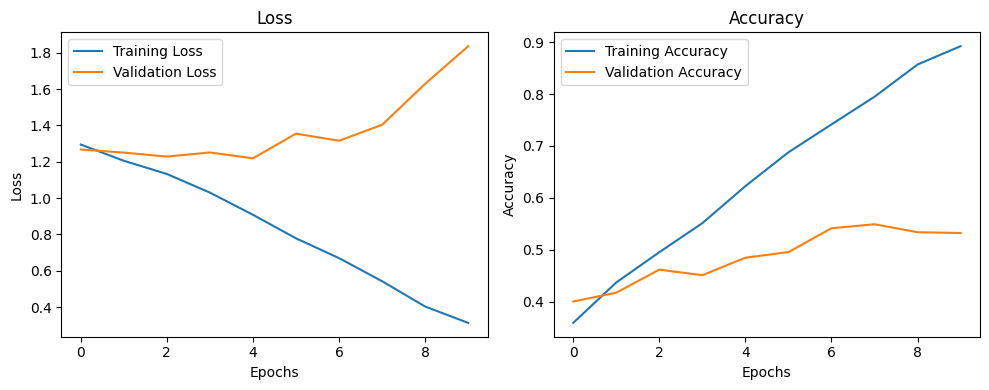

In [19]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# 이미지 데이터와 라벨을 저장할 리스트 생성
image_data = []
labels = []

# 데이터 디렉터리를 반복하며 이미지 로드 및 라벨 부착
data_dir = '../TeamProject/album/'  # 데이터 디렉터리 경로 지정

for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)

    for filename in os.listdir(class_dir):
        image_path = os.path.join(class_dir, filename)

        # 이미지를 열어 NumPy 배열로 변환
        image = Image.open(image_path)
        image = image.resize((48, 48))  # 이미지 크기 조정
        image_array = np.array(image)

        # 이미지와 라벨을 리스트에 추가
        if image_array.shape == (48, 48, 3):  # 이미지 크기와 채널 수 확인
            image_data.append(image_array)
            labels.append(class_name)   

# 이미지 데이터와 라벨을 NumPy 배열로 변환
image_data = np.array(image_data)
labels = np.array(labels)

# 나머지 데이터 처리 및 모델 학습 부분은 이전 코드와 동일하게 진행


# 클래스 라벨을 원-핫 인코딩으로 변환
labels = pd.get_dummies(labels).astype(int).to_numpy()

# 이미지 데이터 정규화 (0~1 사이로 스케일 조정)
image_data = image_data / 255.0

# 데이터를 학습 및 검증 데이터로 분할
X_train, X_val, y_train, y_val = train_test_split(image_data, labels, test_size=0.2, random_state=42)

# CNN 모델 생성

model=Sequential()
model.add(Conv2D(32, (3,3), activation='relu',input_shape=(48, 48, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# 데이터 증강 (선택적)
# datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
# datagen.fit(X_train)

# 모델 학습
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val))

# 학습 과정 시각화
def plot_training_history(history):
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)

# 모델 평가 또는 예측 코드를 추가해야 합니다.


In [ ]:
# Loss 그래프 (왼쪽 그래프):
# Training Loss (훈련 손실): 이 그래프는 각 학습 에포크(학습 주기)에 대한 훈련 데이터의 손실을 나타냅니다. 
#     손실은 모델이 예측한 결과와 실제 정답 간의 차이를 나타내며, 학습이 진행됨에 따라 이 손실이 감소해야 합니다. 
#     손실이 감소하지 않는 경우 모델이 학습하지 못하고 있는 것을 나타낼 수 있습니다.
# Validation Loss (검증 손실): 이 그래프는 각 학습 에포크에 대한 검증 데이터의 손실을 나타냅니다. 
#     모델이 훈련 데이터에 과적합되지 않도록 하기 위해 검증 데이터를 사용하여 모델을 평가하는 것이 일반적입니다. 
#     검증 손실은 학습 손실과 유사하게 감소해야 합니다.

# Accuracy 그래프 (오른쪽 그래프):
# Training Accuracy (훈련 정확도): 이 그래프는 각 학습 에포크에 대한 훈련 데이터의 정확도를 나타냅니다. 
#     정확도는 모델이 정확한 예측을 얼마나 많이 하는지를 나타내며, 학습이 진행됨에 따라 증가해야 합니다.
# Validation Accuracy (검증 정확도): 이 그래프는 각 학습 에포크에 대한 검증 데이터의 정확도를 나타냅니다. 
#     모델이 검증 데이터에 대해서도 정확한 예측을 하는지를 나타냅니다. 훈련 정확도와 검증 정확도 사이에 큰 차이가 나지 않는 것이 이상적입니다.